<a href="https://colab.research.google.com/github/Mhmdaris15/students-academic-performance/blob/main/Students'_Academic_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dependency Files

In [2]:
from google.colab import files
import time
files.upload()
# time.sleep(5)
!cp ./kaggle.json /root/.kaggle/kaggle.json
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip xAPI-Edu-Data.zip

Saving kaggle.json to kaggle (1).json
  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 9.68MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [89]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

### Exploratory Data Analysis (EDA)

In [90]:
# Read dataset
df = pd.read_csv("xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [92]:
df_numeric = df.select_dtypes(include='int64')
df_numeric.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [93]:
df_categoric = df.select_dtypes(include='object')
df_categoric.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [94]:
cat_good_unique = df_categoric.describe().T.loc[df_categoric.describe().T['unique'] <= 3].index
cat_good_unique

Index(['gender', 'StageID', 'SectionID', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

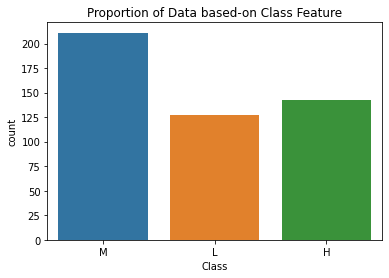

In [95]:
sns.countplot(x=df_categoric['Class'])
plt.title('Proportion of Data based-on Class Feature')
plt.show()

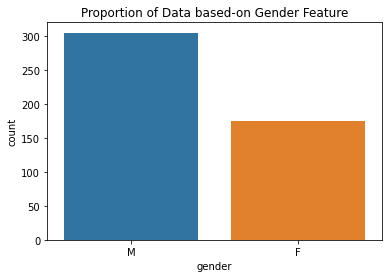

In [96]:
sns.countplot(x=df_categoric['gender'])
plt.title('Proportion of Data based-on Gender Feature')
plt.show()

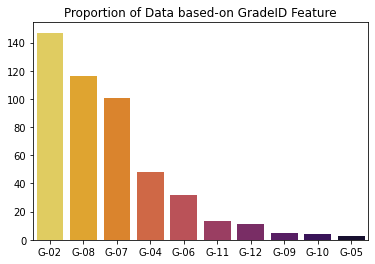

In [97]:
sns.barplot(x=df_categoric['GradeID'].value_counts().index, y=df_categoric['GradeID'].value_counts().values, palette='inferno_r', )
plt.title('Proportion of Data based-on GradeID Feature')
plt.show()

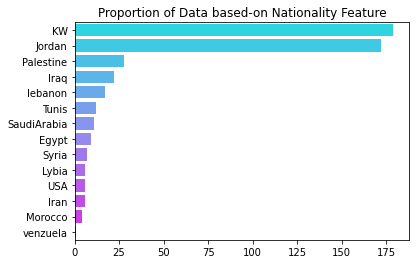

In [98]:
sns.barplot(x=df_categoric['NationalITy'].value_counts().values, y=df_categoric['NationalITy'].value_counts().index, palette='cool')
plt.title('Proportion of Data based-on Nationality Feature')
plt.show()

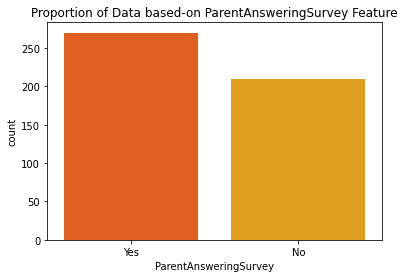

In [99]:
sns.countplot(df_categoric['ParentAnsweringSurvey'], palette='autumn')
plt.title('Proportion of Data based-on ParentAnsweringSurvey Feature')
plt.show()

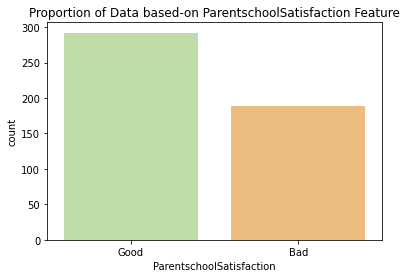

In [100]:
sns.countplot(df_categoric['ParentschoolSatisfaction'], palette='Spectral_r')
plt.title('Proportion of Data based-on ParentschoolSatisfaction Feature')
plt.show()

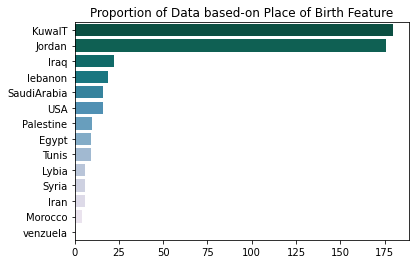

In [101]:
sns.barplot(x=df['PlaceofBirth'].value_counts().values, y=df['PlaceofBirth'].value_counts().index, palette='PuBuGn_r')
plt.title('Proportion of Data based-on Place of Birth Feature')
plt.show()

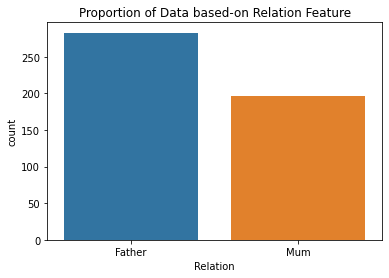

In [102]:
sns.countplot(df_categoric['Relation'])
plt.title('Proportion of Data based-on Relation Feature')
plt.show()

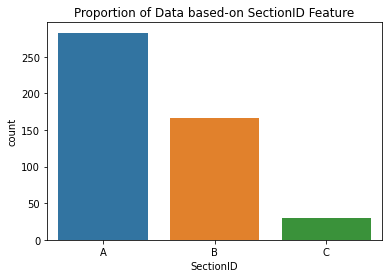

In [103]:
sns.countplot(df_categoric['SectionID'])
plt.title('Proportion of Data based-on SectionID Feature')
plt.show()

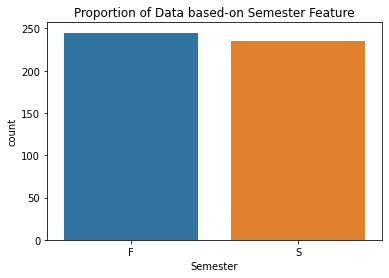

In [104]:
sns.countplot(df_categoric['Semester'])
plt.title('Proportion of Data based-on Semester Feature')
plt.show()

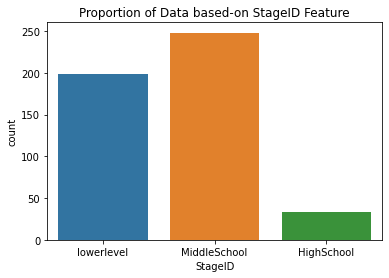

In [105]:
sns.countplot(df_categoric['StageID'])
plt.title('Proportion of Data based-on StageID Feature')
plt.show()

Text(0.5, 1.0, 'Proportion of Data based-on StudentAbsenceDays Feature')

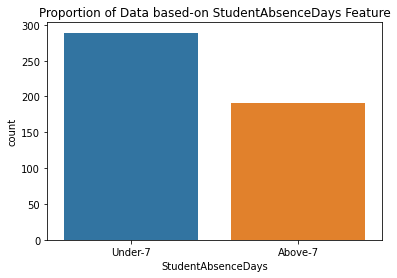

In [106]:
sns.countplot(df_categoric['StudentAbsenceDays'])
plt.title('Proportion of Data based-on StudentAbsenceDays Feature')

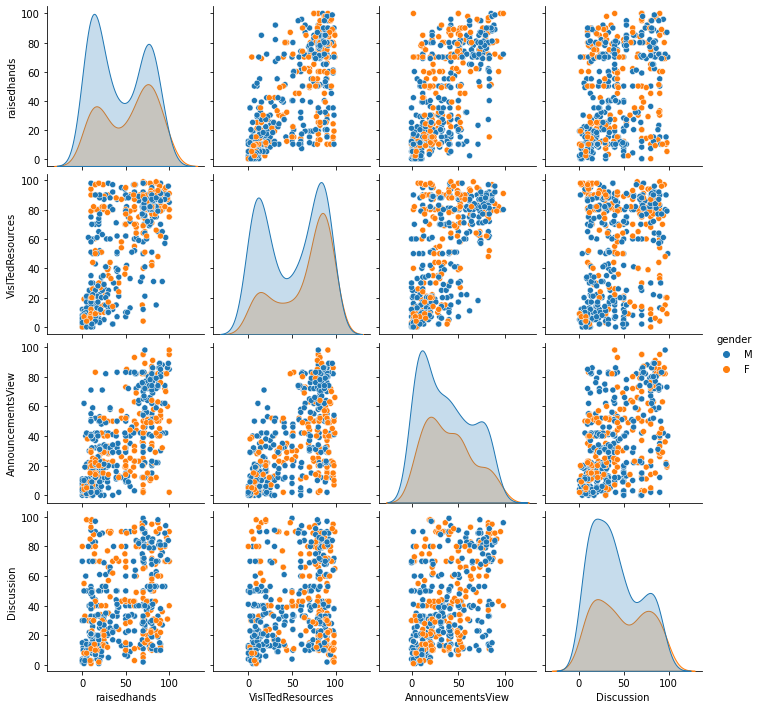

In [107]:
sns.pairplot(df, hue='gender')

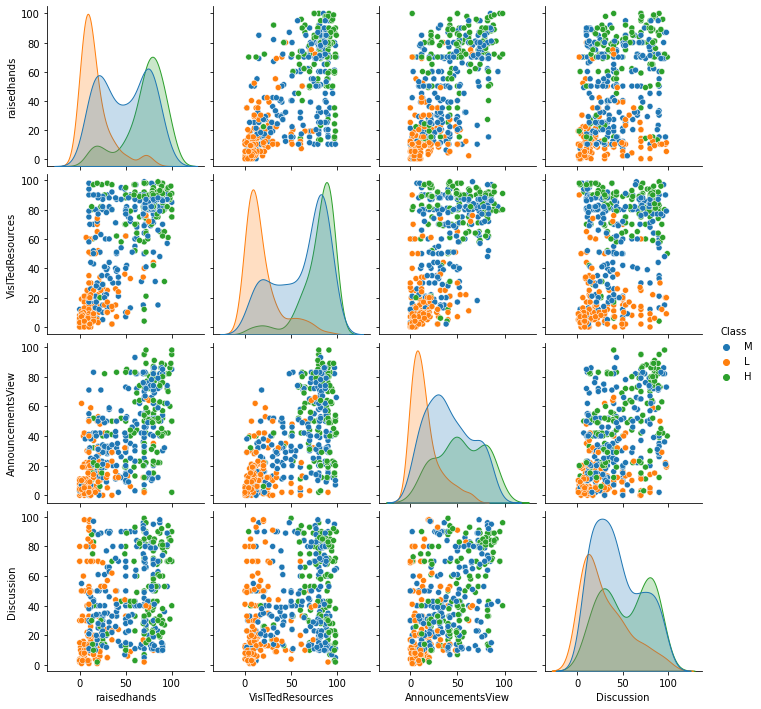

In [108]:
sns.pairplot(df, hue='Class')

In [109]:
import warnings
warnings.filterwarnings('ignore')

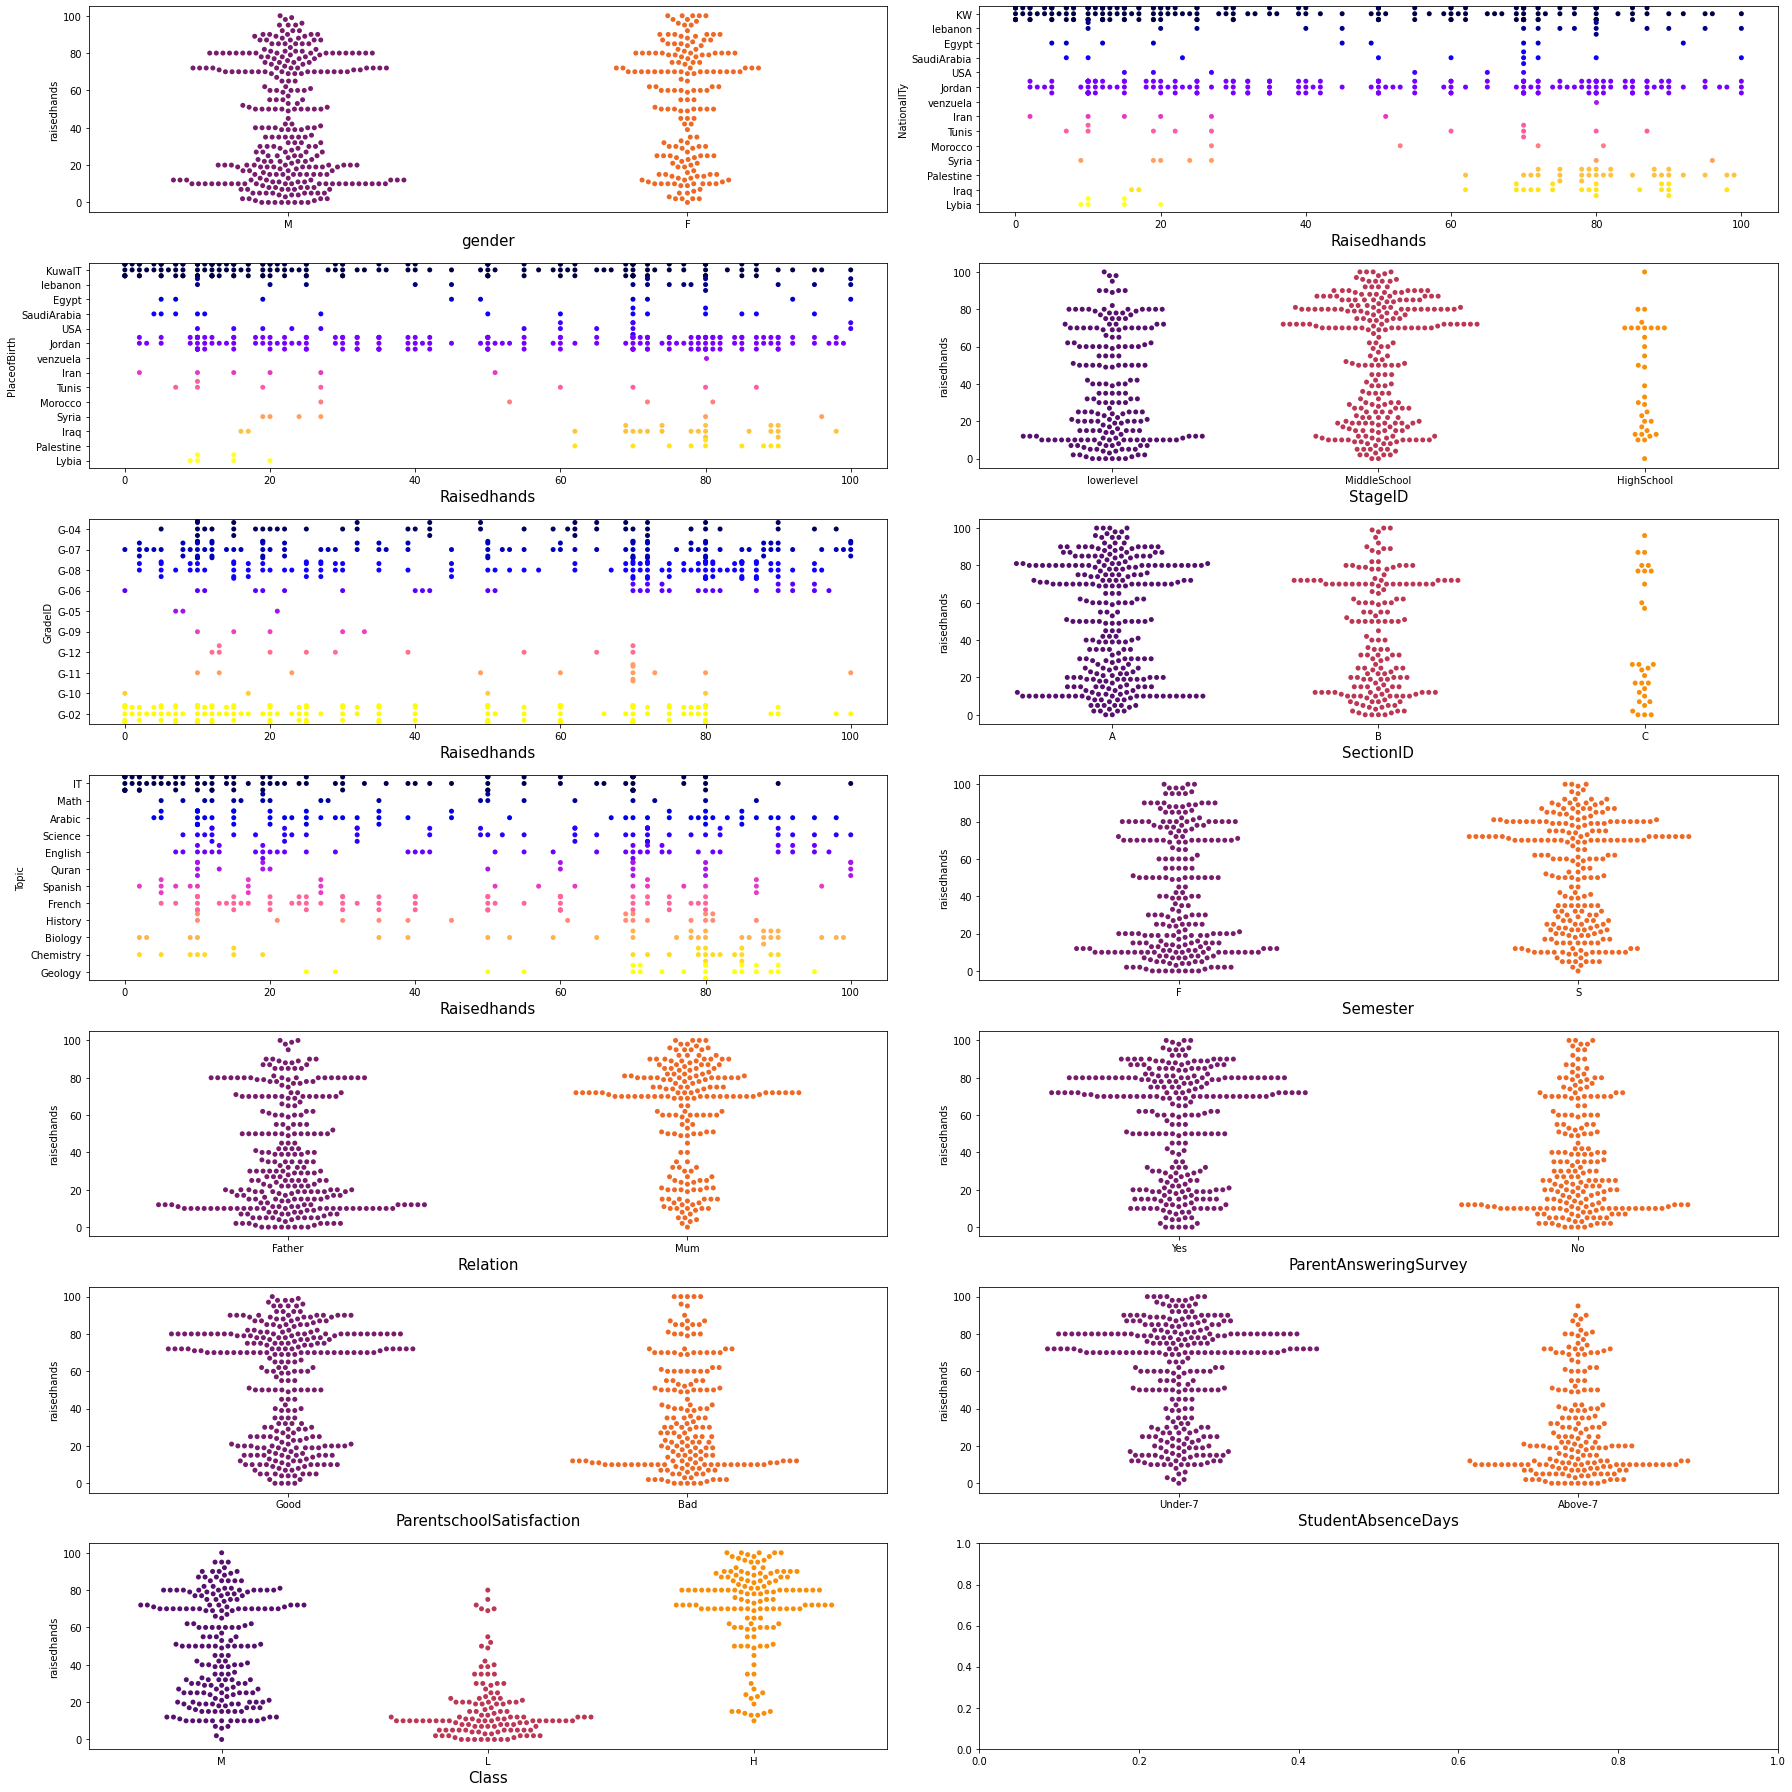

In [110]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.swarmplot(data=df, x='raisedhands', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('Raisedhands', fontsize=15)
      idx += 1
    else:
      sns.swarmplot(data=df, x=df_categoric.columns[idx], y='raisedhands', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

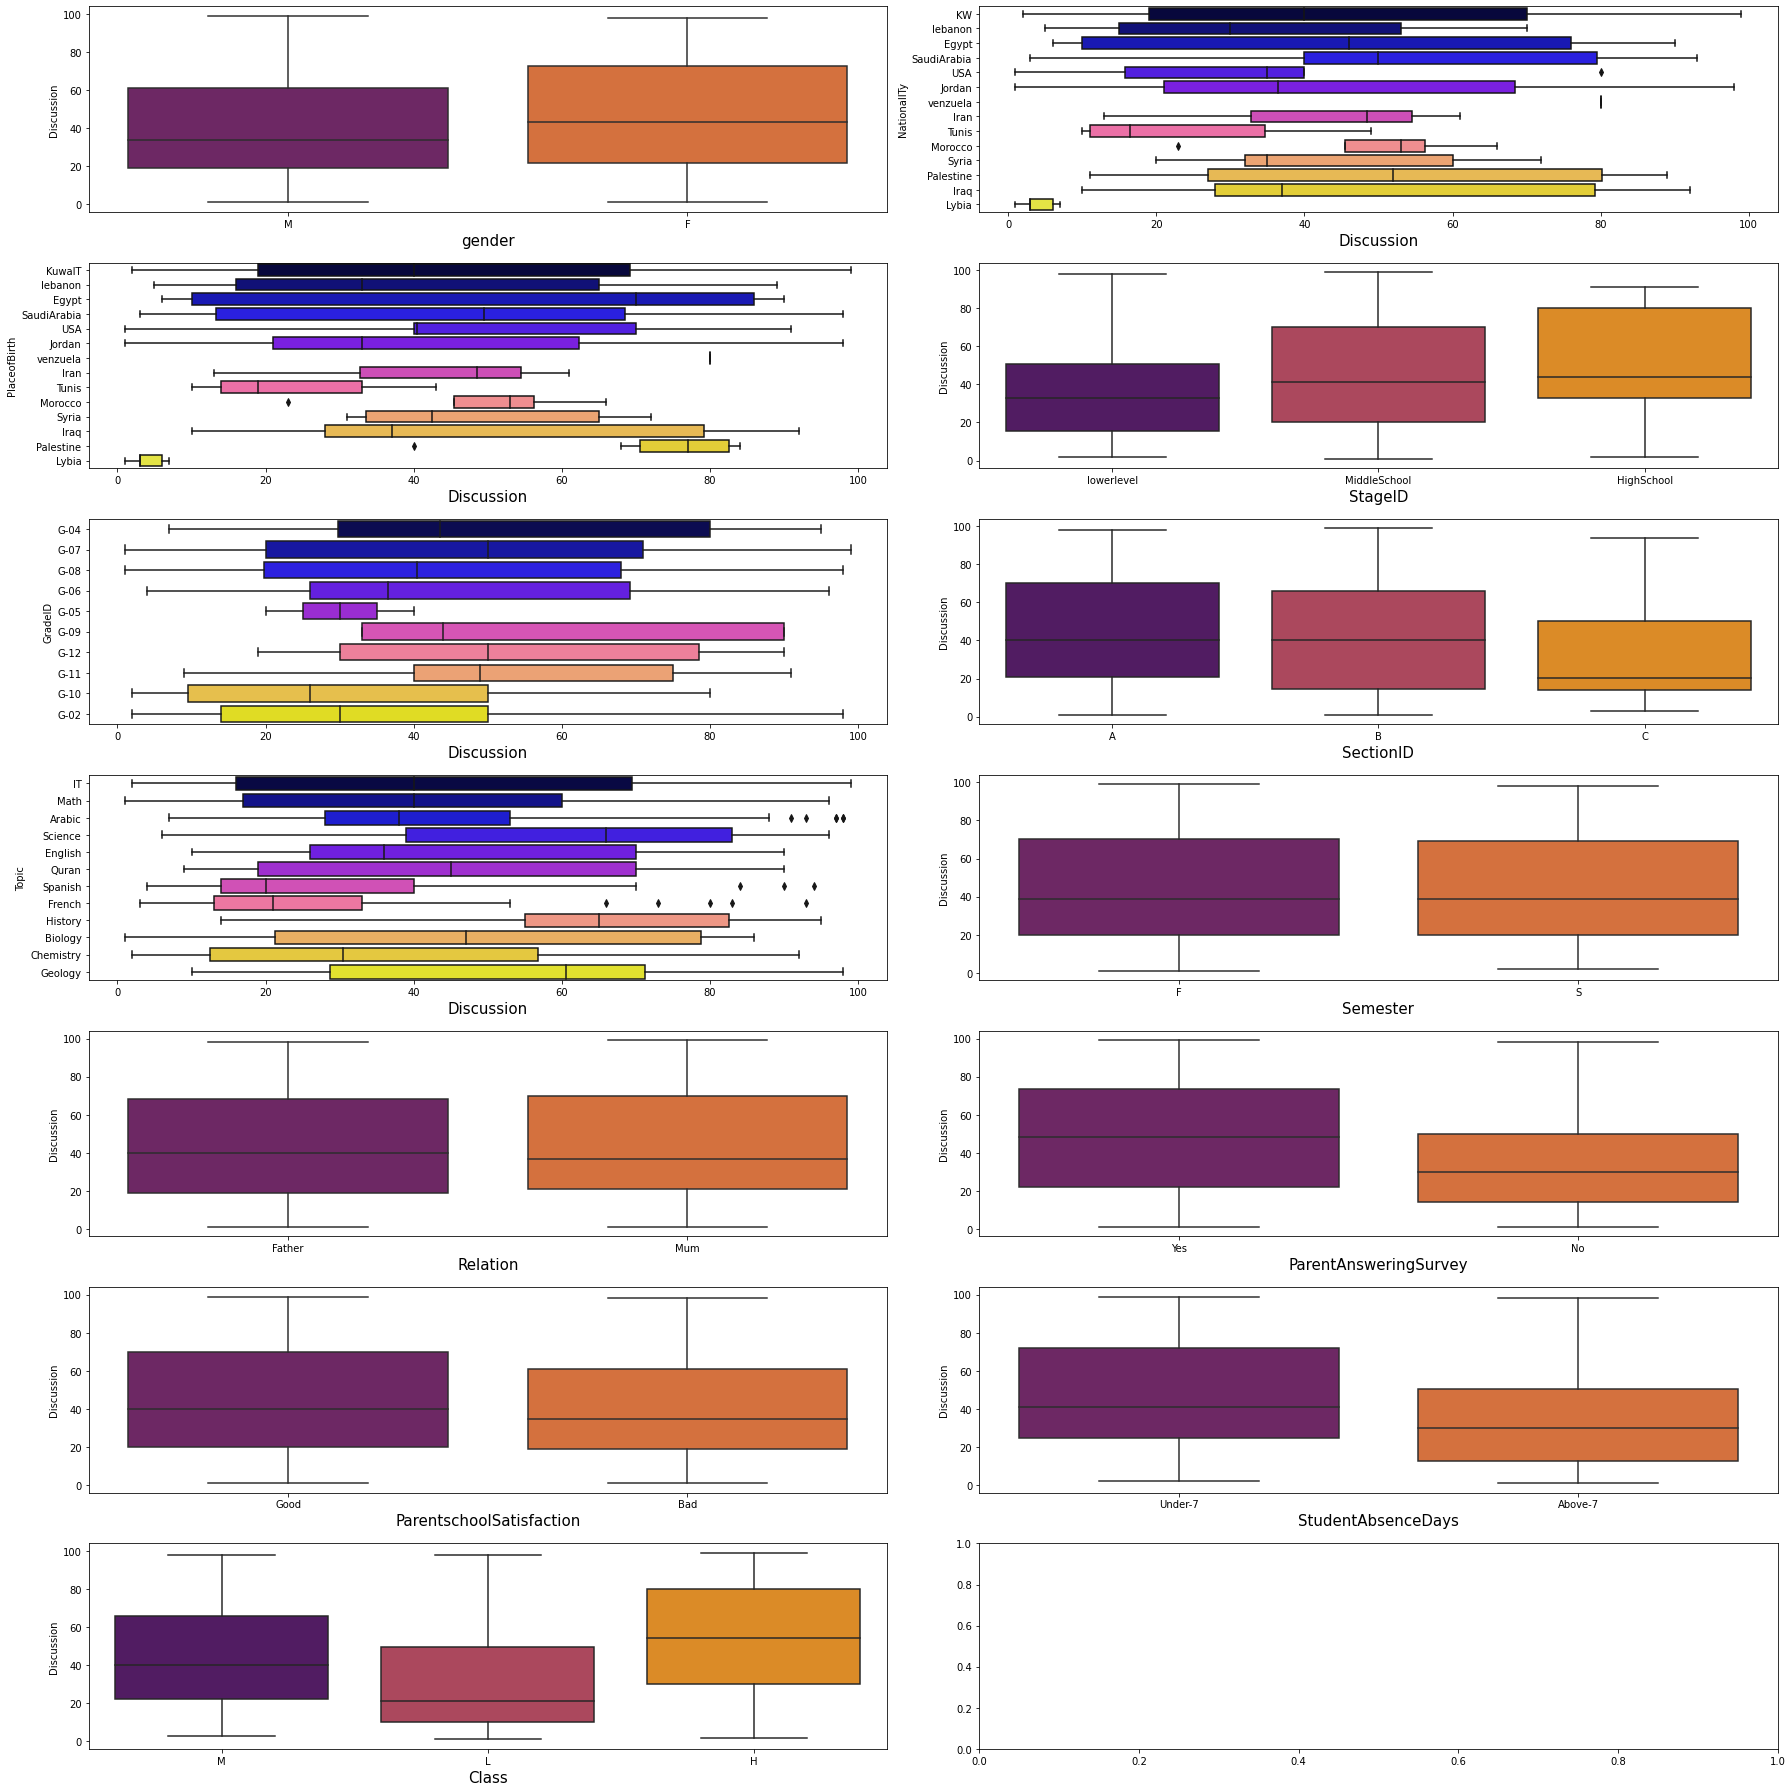

In [111]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.boxplot(data=df, x='Discussion', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('Discussion', fontsize=15)
      idx += 1
    else:
      sns.boxplot(data=df, x=df_categoric.columns[idx], y='Discussion', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

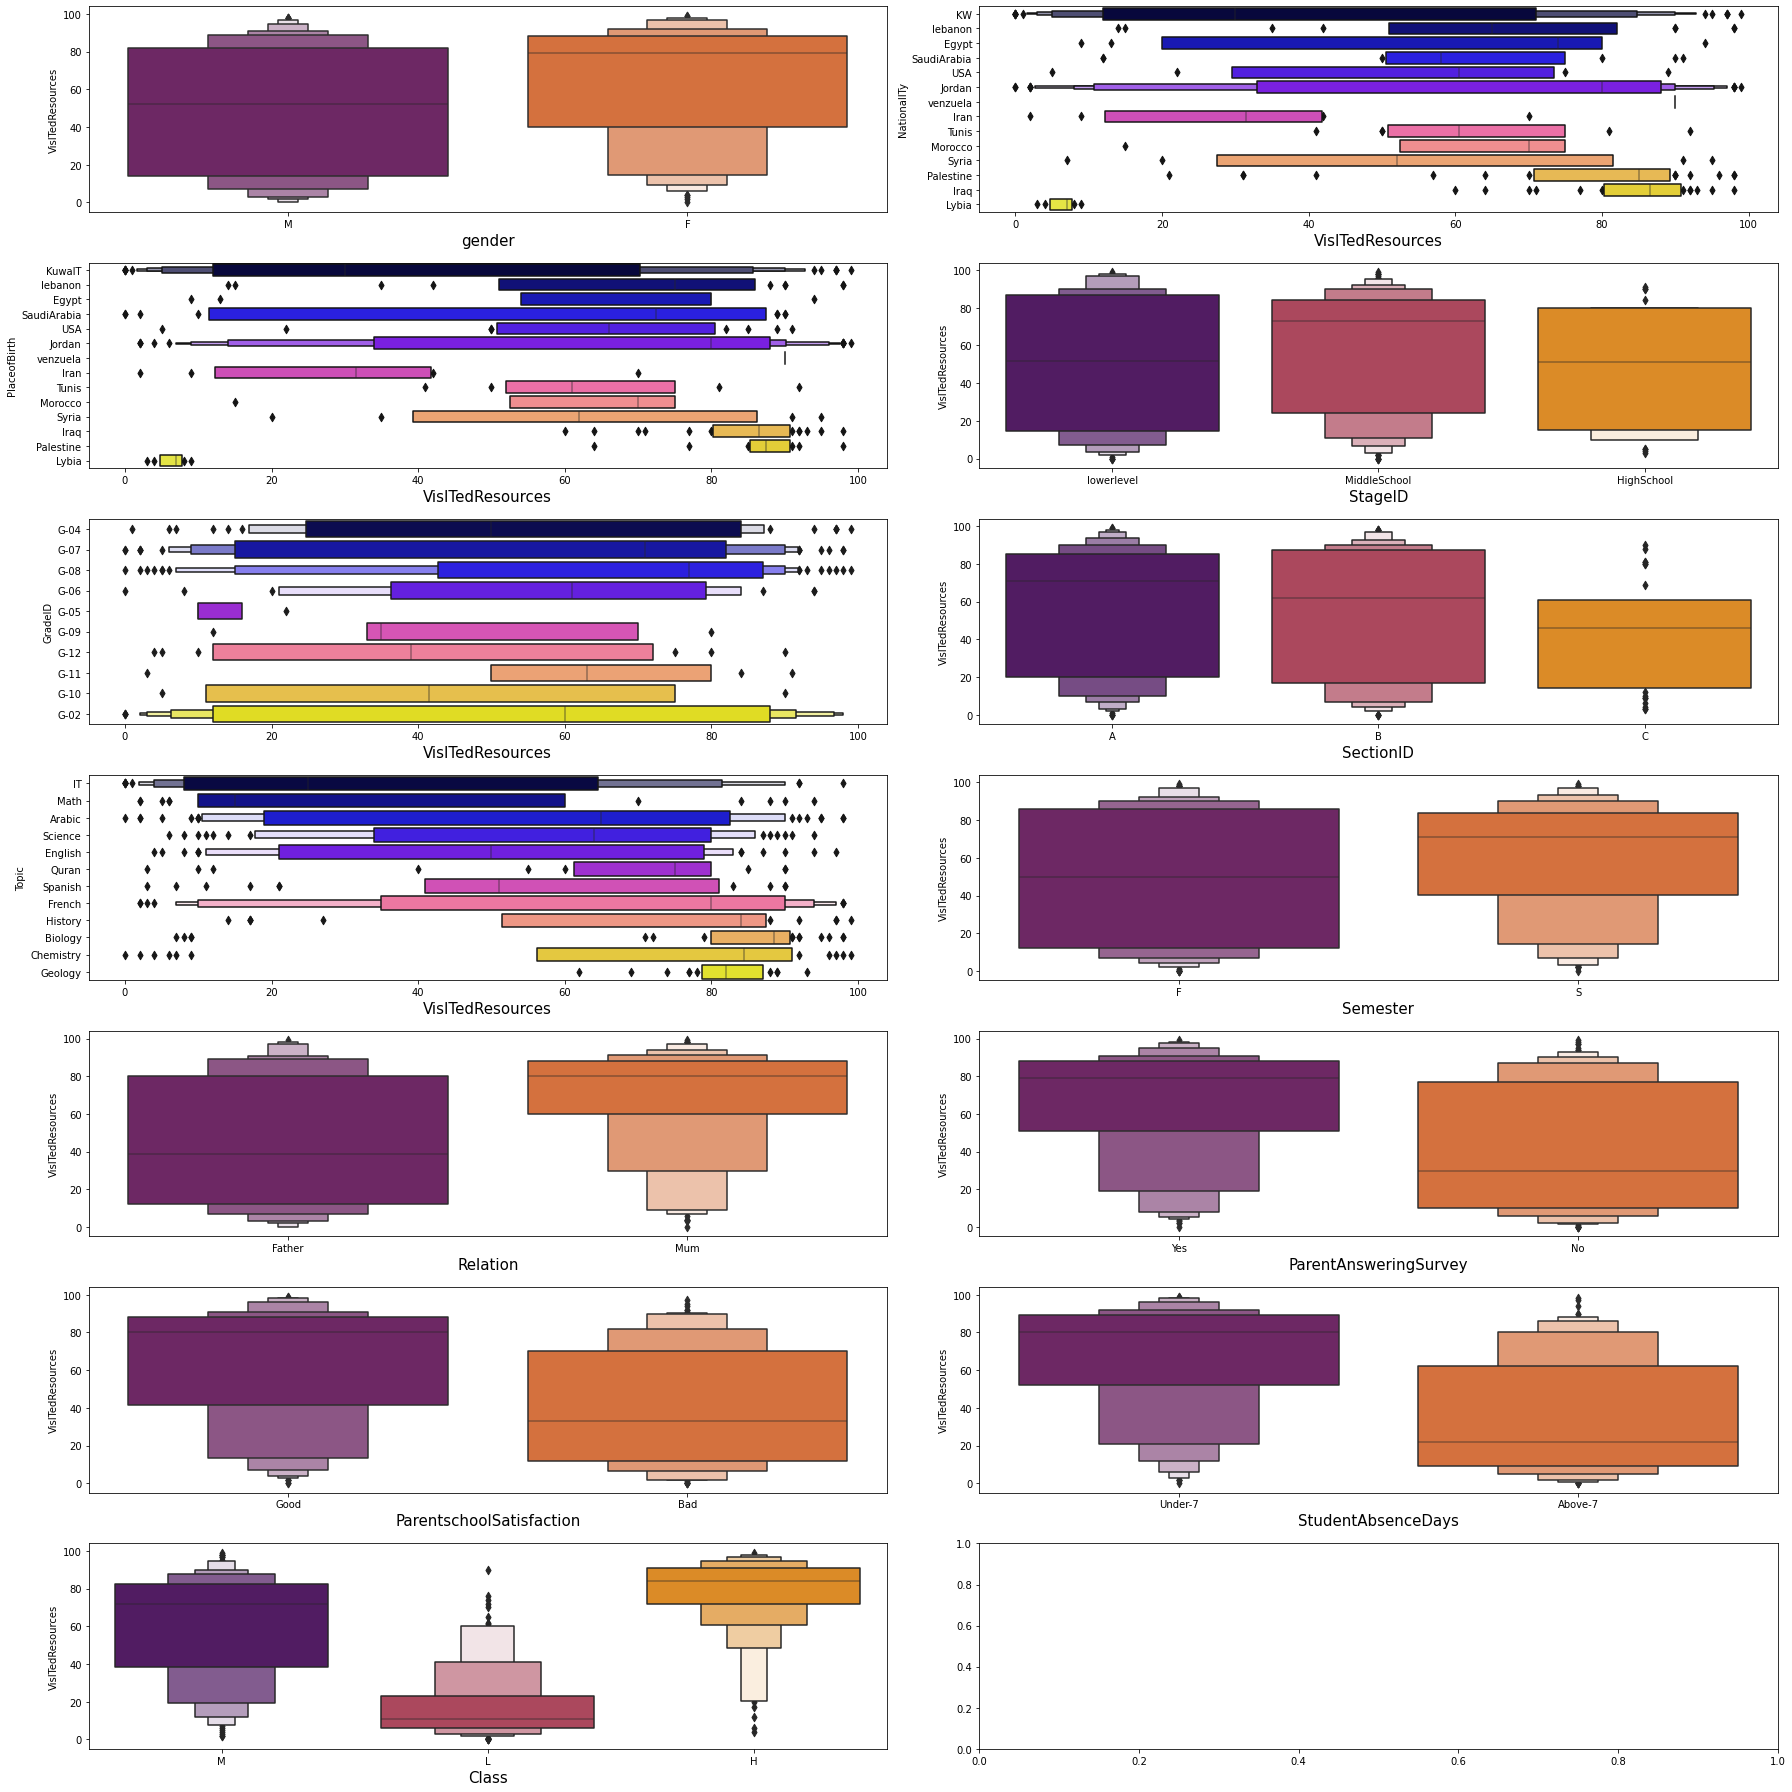

In [112]:
fig, ax = plt.subplots(7, 2, figsize=(25,25))
idx = 0
for i in range(7):
  for j in range(2):
    if i == 6 and j == 1:
      break
    if df[df_categoric.columns[idx]].nunique() > 3:
      sns.boxenplot(data=df, x='VisITedResources', y=df_categoric.columns[idx], palette='gnuplot2', ax=ax[i][j])
      ax[i][j].set_xlabel('VisITedResources', fontsize=15)
      idx += 1
    else:
      sns.boxenplot(data=df, x=df_categoric.columns[idx], y='VisITedResources', palette='inferno', ax=ax[i][j])   
      ax[i][j].set_xlabel(df_categoric.columns[idx], fontsize=15)
      idx += 1
plt.tight_layout()
plt.show()

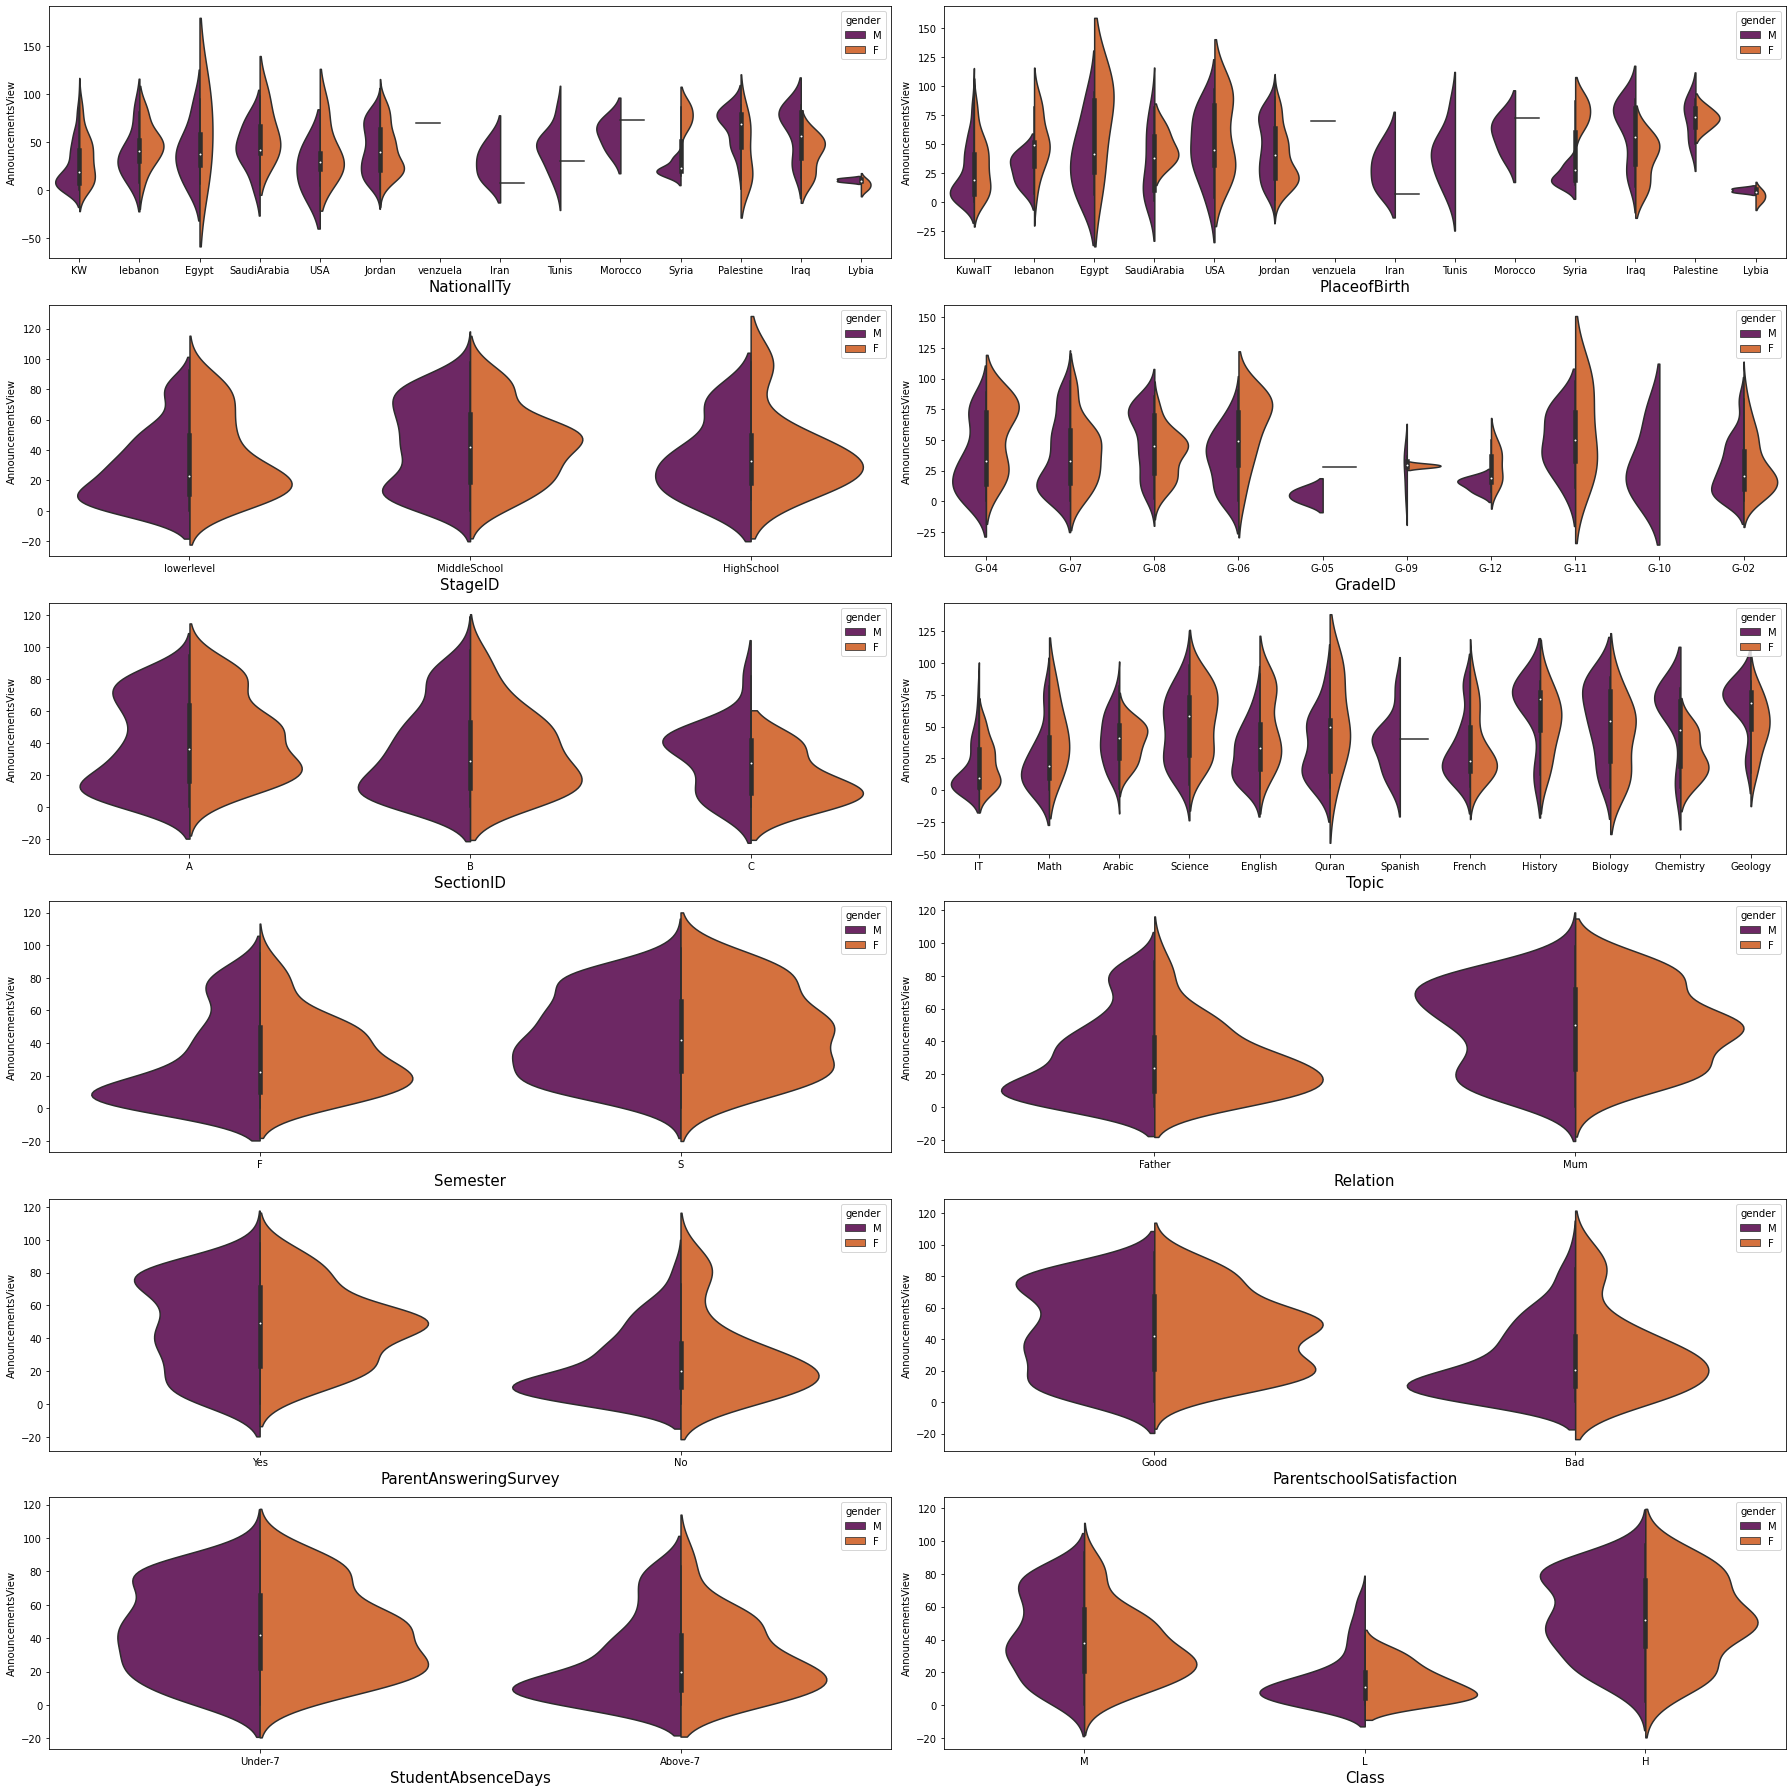

In [113]:
fig, ax = plt.subplots(6, 2, figsize=(25,25))
idx = 0
for i in range(6):
  for j in range(2):
    sns.violinplot(data=df, x=df_categoric.drop(columns=['gender']).columns[idx], y='AnnouncementsView', hue='gender', palette='inferno', split=True, ax=ax[i][j])   
    ax[i][j].set_xlabel(df_categoric.drop(columns=['gender']).columns[idx], fontsize=15)
    idx += 1
plt.tight_layout()
plt.show()

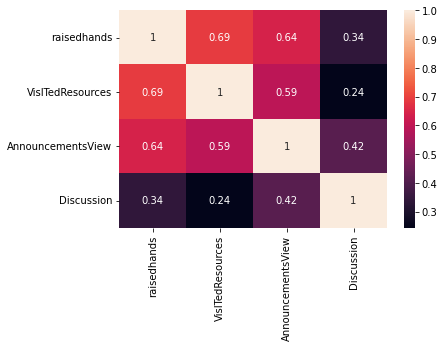

In [114]:
sns.heatmap(df.corr(), annot=True)
# from sklearn.metrics import confusion_matrix 

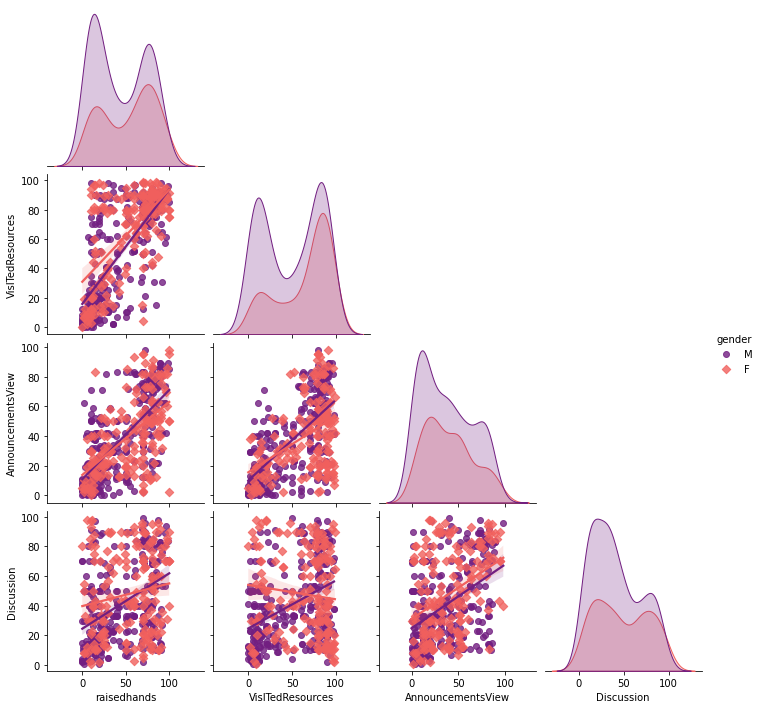

In [115]:
sns.pairplot(data=df, kind='reg', hue='gender', corner=True, markers=['o', 'D'], palette='magma')

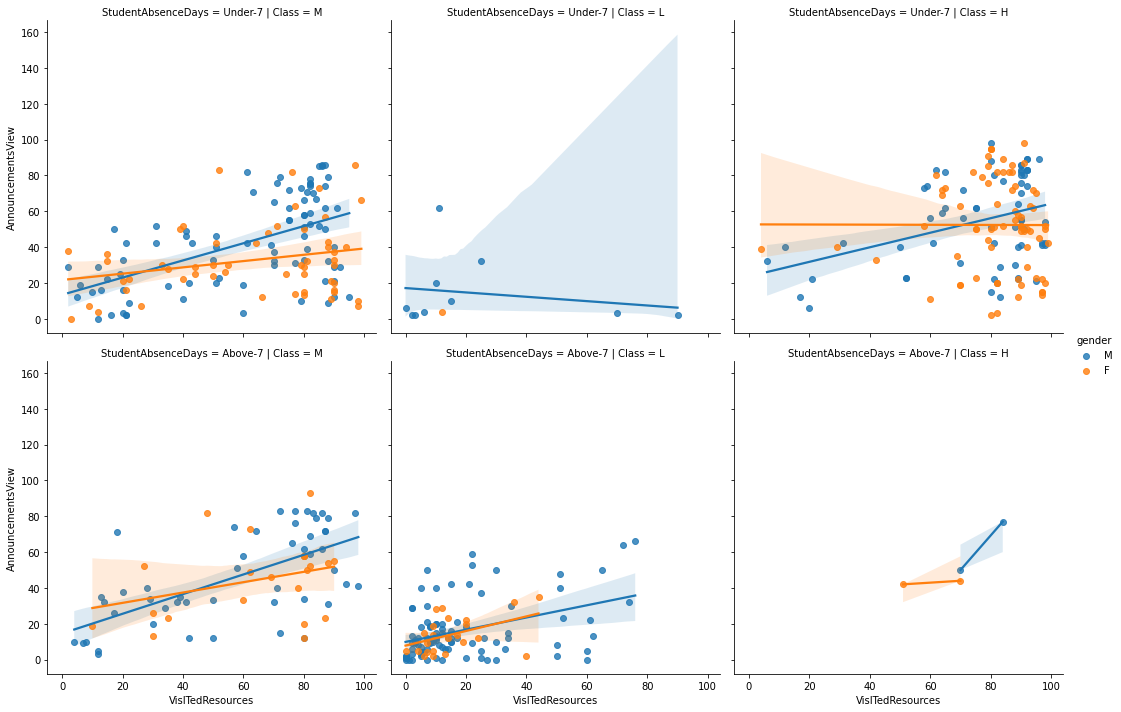

In [116]:
sns.lmplot(x='VisITedResources', y='AnnouncementsView', hue='gender',
           row='StudentAbsenceDays', col='Class', data=df)

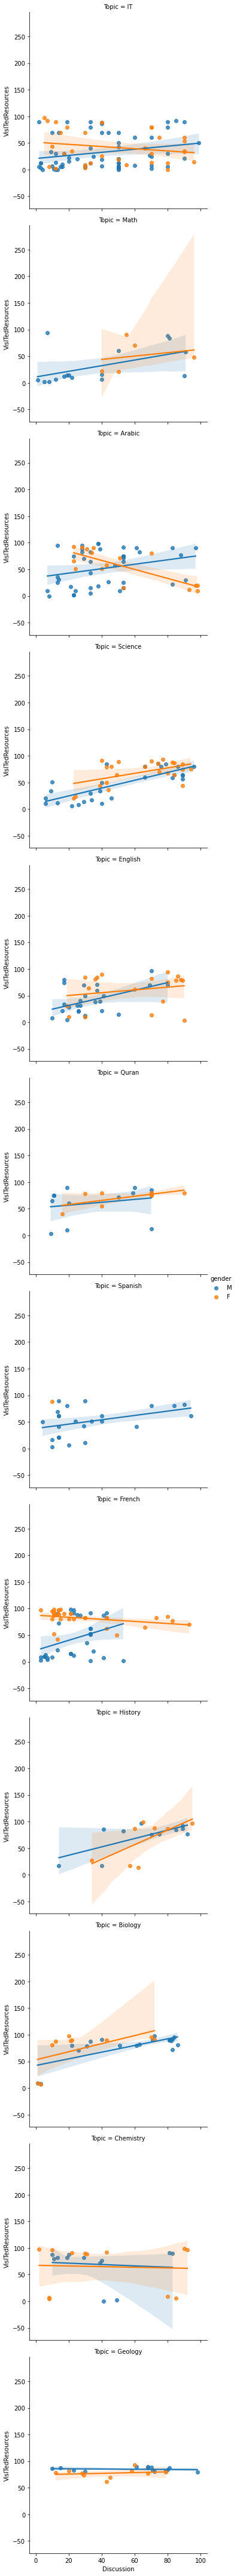

In [117]:
sns.lmplot(x='Discussion', y='VisITedResources', hue='gender',
           row='Topic', data=df)

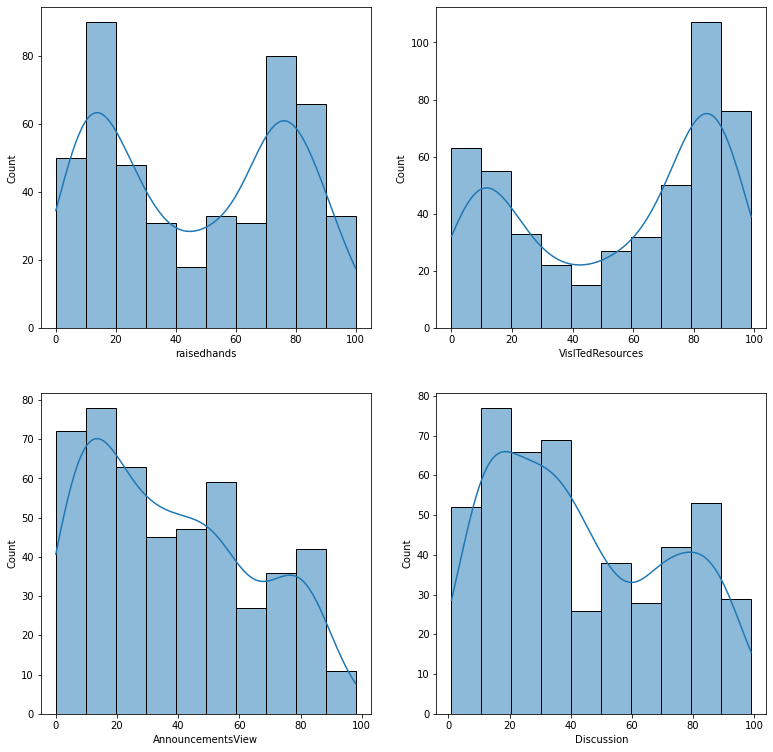

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(13,13))
idx = 0
for i in range(2):
  for j in range(2):
    sns.histplot(df_numeric[df_numeric.columns[idx]], kde=True, ax=ax[i][j])
    idx += 1

### Outliers Detection

In [119]:
from scipy import stats
z = np.abs(stats.zscore(df_numeric))
print(z)

threshold = 3
print(np.where(z > 3))
print(df_numeric[(z < 3).all(axis=1)].shape)

[[1.03342931 1.17407456 1.35116659 0.84332615]
 [0.87081258 1.05302945 1.31354928 0.66222533]
 [1.19604604 1.44642607 1.4264012  0.48112451]
 ...
 [0.26750452 0.58107959 0.48596856 0.51734468]
 [0.54557912 1.14381328 0.89975892 0.49681992]
 [0.3829624  1.23459712 0.56120318 0.67792074]]
(array([], dtype=int64), array([], dtype=int64))
(480, 4)


In [120]:
q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3 - q1
print(iqr)

raisedhands          59.25
VisITedResources     64.00
AnnouncementsView    44.00
Discussion           50.00
dtype: float64


In [121]:
print((df_numeric < (q1 - 1.5 * iqr)) | (df_numeric > (q3 + 1.5 * iqr)))
print(df_numeric[~((df_numeric < (q1 - 1.5 * iqr)) |(df_numeric > (q3 + 1.5 * iqr))).any(axis=1)].shape)

     raisedhands  VisITedResources  AnnouncementsView  Discussion
0          False             False              False       False
1          False             False              False       False
2          False             False              False       False
3          False             False              False       False
4          False             False              False       False
..           ...               ...                ...         ...
475        False             False              False       False
476        False             False              False       False
477        False             False              False       False
478        False             False              False       False
479        False             False              False       False

[480 rows x 4 columns]
(480, 4)


### Normalization

In [122]:
from scipy import stats

df_numeric_normalized = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())
df_numeric_normalized.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000


Text(0.5, 0.98, 'Normalized Numeric Data')

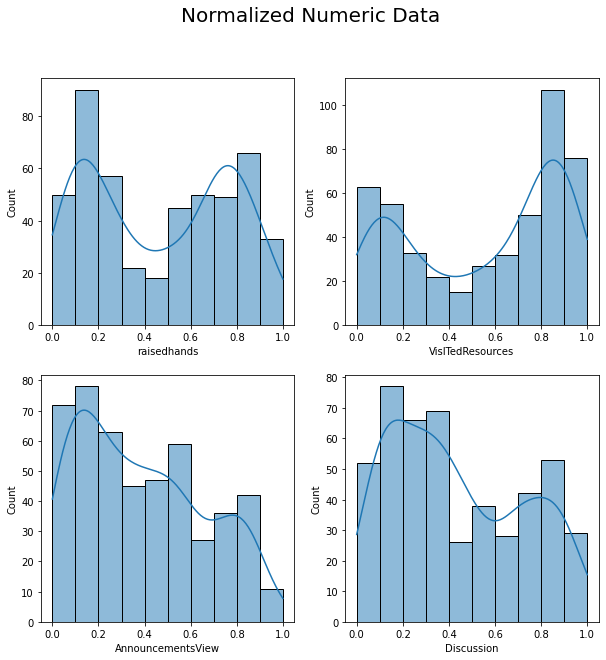

In [123]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
idx = 0
for i in range(2):
  for j in range(2):
    sns.histplot(df_numeric_normalized[df_numeric_normalized.columns[idx]], kde=True, ax=ax[i][j])
    idx += 1
plt.suptitle('Normalized Numeric Data', fontsize=20)

### Standardization

In [124]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df_numeric_standardized = pd.DataFrame(StandardScaler().fit_transform(df_numeric), columns=df_numeric.columns)
display(df_numeric_standardized.head())

df_numeric_robusted = pd.DataFrame(RobustScaler().fit_transform(df_numeric), columns=df_numeric.columns)
display(df_numeric_robusted.head())

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.033429,-1.174075,-1.351167,-0.843326
1,-0.870813,-1.053029,-1.313549,-0.662225
2,-1.196046,-1.446426,-1.426401,-0.481125
3,-0.545579,-0.901723,-1.238315,-0.300024
4,-0.220346,-0.145191,-0.974994,0.243279


,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-0.590717,-0.765625,-0.704545,-0.38
1,-0.506329,-0.703125,-0.681818,-0.28
2,-0.675105,-0.906250,-0.750000,-0.18
3,-0.337553,-0.625000,-0.636364,-0.08
4,-0.168776,-0.234375,-0.477273,0.22


Text(0.5, 0.98, 'Robusted Numeric Data')

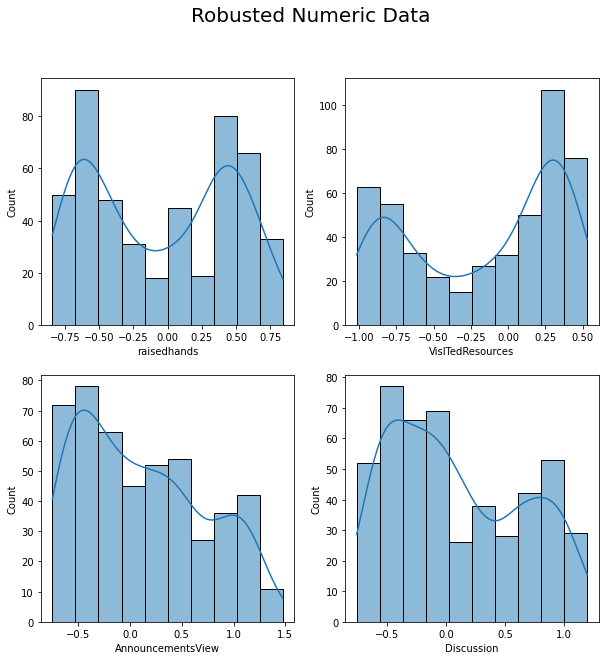

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
idx = 0
for i in range(2):
  for j in range(2):
    sns.histplot(df_numeric_robusted[df_numeric_robusted.columns[idx]], kde=True, ax=ax[i][j])
    idx += 1
plt.suptitle('Robusted Numeric Data', fontsize=20)

Text(0.5, 0.98, 'Standardized Numeric Data')

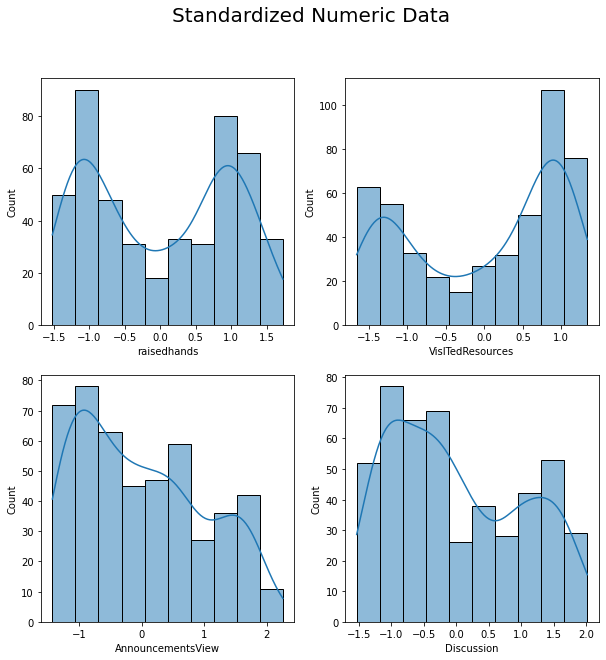

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
idx = 0
for i in range(2):
  for j in range(2):
    sns.histplot(df_numeric_standardized[df_numeric_standardized.columns[idx]], kde=True, ax=ax[i][j])
    idx += 1
plt.suptitle('Standardized Numeric Data', fontsize=20)

### Selecting Features

In [138]:
# Delete unneeded Features such as, PlaceofBirth and Relation
try:
  df_categoric = df_categoric.drop(['PlaceofBirth', 'Relation'], axis=1)
  df = df.drop(['PlaceofBirth', 'Relation'], axis=1)
except KeyError:
  pass

X = df.drop(['Class'], axis=1)
y = df['Class']

### OneHotEncoder

In [139]:
low_cat_cols = df_categoric.columns[df_categoric.nunique() <= 4].to_list()
# pd.get_dummies(df, columns=low_cat_cols)
X = pd.get_dummies(X, columns=X.select_dtypes(include='object').columns)
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
476,50,77,14,28,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


### LabelEncoder

In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# y_encode = LabelEncoder().fit_transform(y)
try:
  y.replace(['L', 'M', 'H'], [1, 2, 3], inplace=True)
except:
  pass
y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

### Modelling

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
for i in (X_train, y_train, X_test, y_test):
  display(i.head())

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
78,13,3,11,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
242,22,20,18,6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
409,53,88,9,33,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
407,3,8,19,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
165,72,65,73,66,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1


78     1
242    1
409    2
407    1
165    3
Name: Class, dtype: int64

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
293,62,64,72,84,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1
283,97,87,82,86,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
34,12,11,8,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
380,11,20,20,98,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
430,85,89,22,61,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1


293    3
283    3
34     1
380    1
430    3
Name: Class, dtype: int64

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Train Model
knn = knn.fit(X_train, y_train)

# Predict Model
y_pred_knn = knn.predict(X_test)

# Model Accuracy
knn.score(X_test, y_test)

0.6354166666666666

### Tuning KNearestNeighbors Model with Cross Validation

In [159]:
from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(), X, y, cv=5)

array([0.55208333, 0.63541667, 0.59375   , 0.63541667, 0.58333333])

### Tuning Model with GridSerchCV

In [181]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {
    'n_neighbors' : range(0,11),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gscv = GridSearchCV(estimator=knn, param_grid=params, cv=11)
gscv.fit(X, y)
print(gscv.best_estimator_)
print('The best Index \t\t:', gscv.best_index_)
print('The best Score \t\t:', gscv.best_score_)
print('The best Parameters \t:', gscv.best_params_)
print('Classes \t\t:', gscv.classes_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
The best Index 		: 36
The best Score 		: 0.6209398423986163
The best Parameters 	: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
Classes 		: [1 2 3]
